[link](https://docs.google.com/document/d/1h_1_UxUdzhkjzhMZCcibNOufkU9asa7cdWIZHOFeUMc/edit#heading=h.6qxxdaq5ec9c)


# Setup





In [1]:
# Imports para manipulação e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact



### Configurações

In [2]:
# Defininando a quantidade de casas decimais da visualização dos dados no Pandas
pd.set_option('display.float_format', '{:.2f}'.format)

sns.set_theme(style="whitegrid", palette="muted")

### Funções customizadas

Para facilitar a interpretação e explicação das funções utilizadas multiplas vezes, inclui elas abaixo,
- As funções poderiam ser incluidas em um arquivo separado em formato `.py` e importadas no inicio do notebook, decidi por não fazer isso para facilitar a interpretação.

In [3]:
def barplot_custom(df_groupby, col_x, col_y, title, x_label = False, y_label = False, bar_anotate = False, y_lim = False, figsize = (12,8), anotate_float = False):

    ''' 
     Função criada para customizar gráfico de barras.
    '''

    # Plotagem
    plt.figure(figsize= figsize)
    ax = sns.barplot(df_groupby, x=col_x, y = col_y)

    # Definindo título do gráfico
    ax.set_title(title, fontsize=18, weight='bold', color='darkblue')

    # Definição de X_label
    if x_label:
        ax.set_xlabel(x_label, fontsize=14, weight='bold', color='darkblue')
    else:
        ax.set_xlabel("")

    # Definição de Y_label   
    if y_label:
        ax.set_ylabel(y_label, fontsize=14, weight='bold', color='darkblue')
    else: 
        ax.set_ylabel("")

    # Incluindo valores numéricos nas barras
    if bar_anotate:            
        for p in ax.patches:
            if anotate_float:
                ax.annotate(format(p.get_height(), f'.{anotate_float}f'), 
                                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                                  ha = 'center', va = 'center', 
                                  xytext = (0, 9), 
                                  textcoords = 'offset points',
                                  fontsize=12, color='darkblue', weight='bold')
            else:
                ax.annotate(format(p.get_height(), f'.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', 
                  xytext = (0, 9), 
                  textcoords = 'offset points',
                  fontsize=12, color='darkblue', weight='bold')

            
    # Definindo y_limite        
    if y_lim:
        ax.set_ylim(y_lim)

    # Customizando a fonte dos ticks        
    plt.xticks(fontsize=12, weight='bold', color='darkblue')
    plt.yticks(fontsize=12, weight='bold', color='darkblue')
    plt.show()


# Metodologia CRISP-DM

Este projeto será estruturado seguindo a metodologia CRISP-DM (Cross Industry Standard Process for Data Mining). 

## Fases da Metodologia CRISP-DM
![CRISP DM](Imagens/wi-crisp-en2.jpg)




1. **Entendimento do Negócio**
   - Compreender os objetivos e requisitos do projeto do ponto de vista do negócio.
   - Traduzir essas metas em uma definição do problema que possa ser abordada com dados.

2. **Entendimento dos Dados**
   - Coletar dados iniciais e familiarizar-se com eles.
   - Identificar problemas de qualidade dos dados e começar a encontrar insights iniciais.

3. **Preparação dos Dados**
   - Selecionar e limpar os dados relevantes para a análise.
   - Transformar e formatar os dados conforme necessário para as etapas subsequentes.

4. **Modelagem**
   - Selecionar e aplicar técnicas de modelagem apropriadas.
   - Calibrar parâmetros do modelo para otimizar o desempenho.

5. **Avaliação**
   - Avaliar os modelos para garantir que eles atendam aos objetivos do negócio.
   - Revisar todas as etapas anteriores e verificar se há alguma questão que ainda precisa ser abordada.

6. **Implementação**
   - Implementar o modelo em um ambiente de produção.
   - Documentar o processo e preparar um relatório final com os resultados e conclusões.

## Referência

Para mais informações sobre a metodologia CRISP-DM, consulte a documentação original:

- CRISP-DM 1.0: Step-by-step data mining guide. SPSS Inc. 
[Link para o documento](https://www.kde.cs.uni-kassel.de/wp-content/uploads/lehre/ws2012-13/kdd/files/CRISPWP-0800.pdf)



# 1 - Entendimento do Negócio

Inicialmente podemos definir um objetivo principal que é: **identificar qual tipo de filme a PProductions deve desenvolver a seguir para maximizar o retorno sobre o investimento.**

Para isso podemos classificar algumas metas intermediárias para se aprofundar no entendimento do negócio.
 
- Determinar os gêneros de filmes mais lucrativos.
- Analisar tendências de lançamento bem-sucedidas ao longo dos anos.
- Identificar fatores de sucesso (elenco, diretor, enredo).

Também é importante buscar métricas para quantificar.



## 2. Entendimento dos Dados

###  Dicionário de dados.

A base de dados de treinamento contém 15 colunas. Seus nomes são auto-explicativos, mas, caso haja alguma dúvida, a descrição das colunas é:

| Series_Title | Nome do filme                          |
|--------------|----------------------------------------|
| Released_Year| Ano de lançamento                      |
| Certificate  | Classificação etária                   |
| Runtime      | Tempo de duração                       |
| Genre        | Gênero                                 |
| IMDB_Rating  | Nota do IMDB                           |
| Overview     | Overview do filme                      |
| Meta_score   | Média ponderada de todas as críticas   |
| Director     | Diretor                                |
| Star1        | Ator/atriz #1                          |
| Star2        | Ator/atriz #2                          |
| Star3        | Ator/atriz #3                          |
| Star4        | Ator/atriz #4                          |
| No_of_Votes  | Número de votos                        |
| Gross        | Faturamento                            |



### Carreganto dos Dados

In [4]:
# Carregamento inicial dos dados
data_path = 'Data/desafio_indicium_imdb.csv'
df = pd.read_csv(data_path)\
       .drop('Unnamed: 0', axis = 1)

In [5]:
# Leitura das 5 primeiras linhas dos dados
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.90,Gandalf and Aragorn lead the World of Men agai...,94.00,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


* É possivel notar que na coluna `Genre` possui multiplos generos separados por vírgula.
* Os atores podem se repetir em colunas diferentes.
* A coluna `Runtime` referente ao tempo de filme necessita de correção para a remoção dos caracteres indesejados e transformação para um tipo de dado númerico.
* A coluna `Certificate` pode ser tratada como categorica.

In [6]:
# Exibindo um resumo do conjunto de dados 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


* Nota-se a presença de dados ausentes nas colunas `Certificate`, `Meta_score` e `Gross`.
* As colunas `Released_Year` e `Gross` devem ser alteradas o tipo de dado.

### Dados ausentes

In [7]:
# Exibindo a quantidade de dados nulos por coluna.
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Ao analisar a coluna correspondente ao ano de lançamento, é possivel notar que o conjunto de dados possui as informações referente aos filmes lançados do ano 1920 até 2020.


In [8]:
#  Exibindo os anos únicos ordenados de lançamentos dos filmes 
print(df['Released_Year'].sort_values().unique())

#  Exibindo a quantidade anos únicos de lançamentos dos filmes. 
print('\nQuantidade de anos diferentes: {}'.format(len(set(df['Released_Year']))))

['1920' '1921' '1922' '1924' '1925' '1926' '1927' '1928' '1930' '1931'
 '1932' '1933' '1934' '1935' '1936' '1937' '1938' '1939' '1940' '1941'
 '1942' '1943' '1944' '1945' '1946' '1947' '1948' '1949' '1950' '1951'
 '1952' '1953' '1954' '1955' '1956' '1957' '1958' '1959' '1960' '1961'
 '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969' '1970' '1971'
 '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980' '1981'
 '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990' '1991'
 '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000' '2001'
 '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011'
 '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020' 'PG']

Quantidade de anos diferentes: 100


* Existe também um único valor incorreto preenchido com `PG`

In [9]:
df.query('Released_Year == "PG"')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.60,NASA must devise a strategy to return Apollo 1...,77.00,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


* Ao consultar e pesquisar os dados, identifiquei que apenas o ano de lançamento do filme Apollo 13 estava incorreto. Embora essa anomalia seja uma sinalização referente à qualidade do conjunto de dados, a correção foi realizada conforme necessário.

In [10]:
# Visualizando os dados próximos ao filme Apollo 13
df.iloc[962:968]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
962,Die Hard: With a Vengeance,1995,A,128 min,"Action, Adventure, Thriller",7.60,John McClane and a Harlem store owner are targ...,58.00,John McTiernan,Bruce Willis,Jeremy Irons,Samuel L. Jackson,Graham Greene,364420,"100,012,499"
963,Dead Man,1995,R,121 min,"Adventure, Drama, Fantasy",7.60,"On the run after murdering a man, accountant W...",62.00,Jim Jarmusch,Johnny Depp,Gary Farmer,Crispin Glover,Lance Henriksen,90442,"1,037,847"
964,The Bridges of Madison County,1995,A,135 min,"Drama, Romance",7.60,Photographer Robert Kincaid wanders into the l...,69.00,Clint Eastwood,Clint Eastwood,Meryl Streep,Annie Corley,Victor Slezak,73172,"71,516,617"
965,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.60,NASA must devise a strategy to return Apollo 1...,77.00,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"
966,Trois couleurs: Blanc,1994,U,92 min,"Comedy, Drama, Romance",7.60,"After his wife divorces him, a Polish immigran...",88.00,Krzysztof Kieslowski,Zbigniew Zamachowski,Julie Delpy,Janusz Gajos,Jerzy Stuhr,64390,"1,464,625"
967,Falling Down,1993,R,113 min,"Action, Crime, Drama",7.60,An ordinary man frustrated with the various fl...,56.00,Joel Schumacher,Michael Douglas,Robert Duvall,Barbara Hershey,Rachel Ticotin,171640,"40,903,593"


In [11]:
# Correção do ano de lançamento.
df.loc[df['Released_Year'] == 'PG', 'Released_Year'] = 1995

# Transformação para tipo int
df['Released_Year'] = df['Released_Year'].astype(int)

Para auxiliar nas análises criarei uma coluna para segmentar o os filmes por período acumulado de 20

| Anos         | Released_year_tag |
|--------------|-------------------|
| 1920 - 1939  | 1 - Early Cinema  |
| 1940 - 1959  | 2 - Golden Era    |
| 1960 - 1979  | 3 - New Wave      |
| 1980 - 1999  | 4 - Modern Era    |
| 2000 - 2020  | 5 - Contemporary  |

In [12]:
def get_release_year_tag(year) -> str:
    '''
         A função atribui uma tag de ano de lançamento com base no ano fornecido.
    '''
    if 1920 <= year <= 1939:
        return "1 - Early Cinema"
    elif 1940 <= year <= 1959:
        return "2 - Golden Era"
    elif 1960 <= year <= 1979:
        return "3 - New Wave"
    elif 1980 <= year <= 1999:
        return "4 - Modern Era"
    elif 2000 <= year <= 2020:
        return "5 - Contemporary"
    else:
        return "6 - Out of Range"

In [13]:
df['Year_Tag'] = df['Released_Year'].apply(get_release_year_tag)

In [14]:
df.groupby('Year_Tag')[['Series_Title']].count()

,Series_Title
Year_Tag,
1 - Early Cinema,35
2 - Golden Era,91
3 - New Wave,149
4 - Modern Era,239
5 - Contemporary,485


Uma hipótese que vale ser analisada é se existe algum período de tempo em que há maior incidência de dados ausentes.

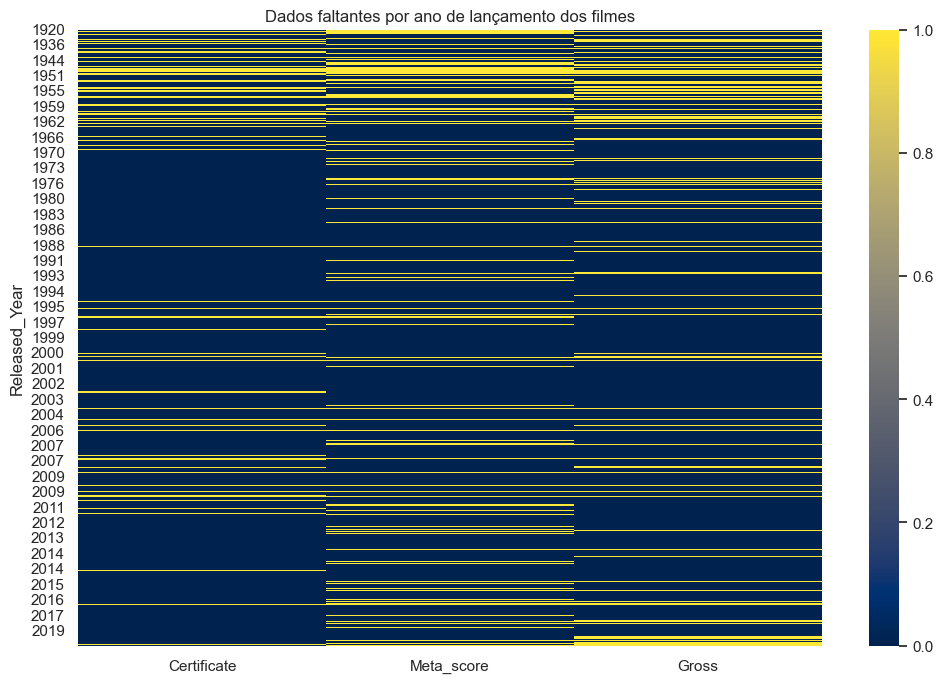

In [15]:
# Gráfico de calor de dados ausentes por ano de lançamento dos filmes
plt.figure(figsize=(12,8))
ax = sns.heatmap(df[['Released_Year','Certificate','Meta_score','Gross']].set_index('Released_Year').sort_values(by = 'Released_Year').isnull(), cmap='cividis')
ax.set_title('Dados faltantes por ano de lançamento dos filmes')
plt.show()

Criei a função `verifica_dados_ausentes_por_ano` para verificar a proporção da quantidade de dados ausentes.

In [16]:
def verifica_dados_ausentes_por_ano(df, ano) -> pd.DataFrame:
    '''
       A função verifica a quantidade e a proporção de dados faltantes até o ano especificado.
    '''

    # Para anos <= ano
    consulta_abaixo = df.query(f'Released_Year <= {ano}')
    tamanho_ano_abaixo = len(consulta_abaixo)
    dados_ausentes_abaixo = consulta_abaixo.isna().sum()
    dados_ausentes_abaixo = dados_ausentes_abaixo[dados_ausentes_abaixo > 0]
    proporcao_a_abaixo = (dados_ausentes_abaixo / tamanho_ano_abaixo) * 100
    
    # Para anos > ano
    consulta_acima = df.query(f'Released_Year > {ano}')
    tamanho_ano_acima = len(consulta_acima)
    dados_ausentes_acima = consulta_acima.isna().sum()
    dados_ausentes_acima = dados_ausentes_acima[dados_ausentes_acima > 0]
    proporcao_a_acima = (dados_ausentes_acima / tamanho_ano_acima) * 100

    # Concatenando os resultados em um DataFrame final
    df_output = pd.concat([dados_ausentes_abaixo, 
                           proporcao_a_abaixo, 
                           dados_ausentes_acima, 
                           proporcao_a_acima], axis=1, 
                           keys=[f'Qtd de Dados Faltantes Ano <= {ano}', 
                                 f'% Dados Faltantes Ano <= {ano}',
                                 f'Qtd de Dados Faltantes Ano > {ano}', 
                                 f'% Dados Faltantes Ano > {ano}']
                           )
    # Retornando o DataFrame estilizando com um mapa de calor por coluna. 
    return df_output.style.background_gradient(cmap="coolwarm")

- Após os anos 80 dimínui consideravelmente a quantidade de dados ausentes.

In [17]:
# Exibindo a quantiadade e proporção dos dados ausentes por ano menor e maior que 1980.
verifica_dados_ausentes_por_ano(df, 1980)

,Qtd de Dados Faltantes Ano <= 1980,% Dados Faltantes Ano <= 1980,Qtd de Dados Faltantes Ano > 1980,% Dados Faltantes Ano > 1980
Certificate,57,20.141343,44,6.145251
Meta_score,67,23.674912,90,12.569832
Gross,97,34.275618,72,10.055866


In [18]:
# Utilizando o decorardor interact do Ipywidgets para visualizar de forma interativa os dados ausentes.
@interact(ano = set(df.Released_Year))
def analisa_ano(ano):
    return verifica_dados_ausentes_por_ano(df,ano)

interactive(children=(Dropdown(description='ano', options=(1920, 1921, 1922, 1924, 1925, 1926, 1927, 1928, 193…

### Dados duplicados

Não identifiquei linhas duplicadas no conjunto de dados.

In [19]:
# Verificando se existem linhas em todos os dados são duplicados
df[df.duplicated()]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year_Tag


No entanto, verifiquei também a presença de filmes com nomes duplicados e se existem descrições repetidas.

In [20]:
# Verificando se existem títulos de filmes duplicados
df[df.duplicated(subset=['Series_Title'])]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year_Tag
135,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.20,Desperate measures are taken by a man who trie...,NaN,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,"739,478",5 - Contemporary


Ao pesquisar sobre estes títulos identifiquei que são filmes distintos.

In [21]:
# Filmes com Títulos íguais.
df[df['Series_Title'] == 'Drishyam']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year_Tag
86,Drishyam,2013,U,160 min,"Crime, Drama, Thriller",8.30,A man goes to extreme lengths to save his fami...,NaN,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,NaN,5 - Contemporary
135,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.20,Desperate measures are taken by a man who trie...,NaN,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,"739,478",5 - Contemporary


Não há descrições duplicadas.

In [22]:
# Verificando se existem descrições de filmes duplicadas
df[df.duplicated(subset=['Overview'])]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year_Tag


Analisarei as informações presentes na coluna `Certificate`.

[Siglas de Certificação](https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39?ref_=helpart_nav_27#)

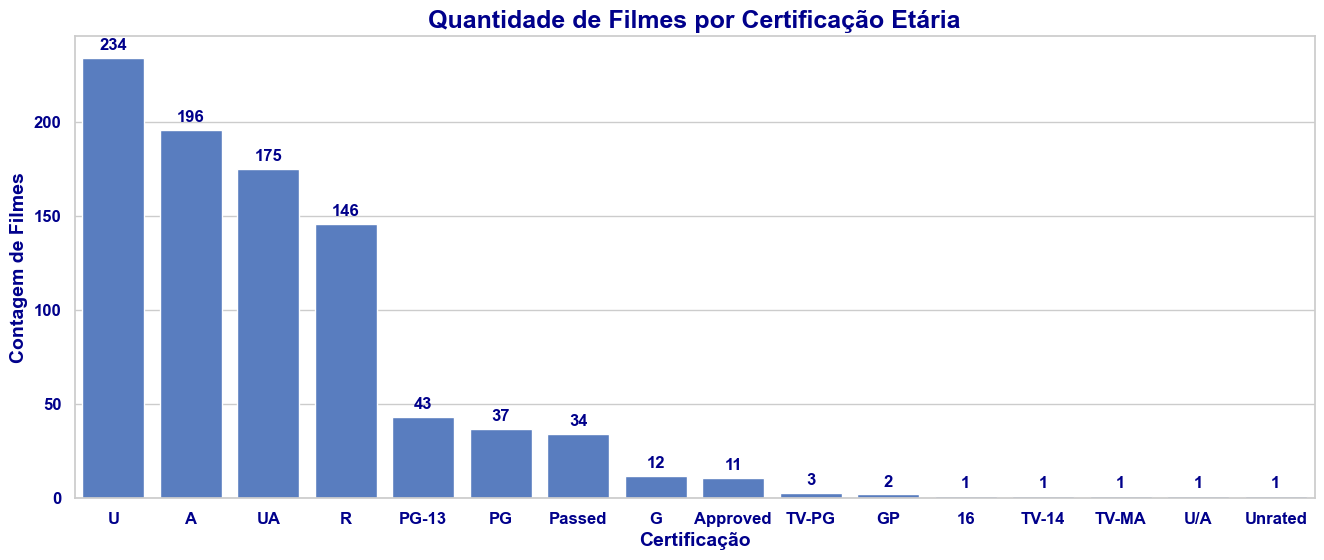

In [23]:
df_groupby = df_groupby = df.groupby("Certificate", dropna=False).agg(quantidade_filmes = ('Series_Title', 'count'))\
                            .sort_values('quantidade_filmes',ascending=False)


barplot_custom(df_groupby,
               figsize=(16,6),
               col_x= 'Certificate',
               col_y = 'quantidade_filmes',
               title="Quantidade de Filmes por Certificação Etária",
               y_label='Contagem de Filmes',
               x_label = "Certificação",
               bar_anotate = True)

In [24]:
df['Gross'] = df['Gross'].str.replace(',','').astype(float)
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

In [25]:
df.groupby(['Certificate','Year_Tag'], dropna=False).agg(quantidade_filmes = ('Year_Tag','count'), 
                                                         soma_gross = ('Gross','sum'),
                                                         gross_medio = ('Gross','mean'))\
  .sort_values('soma_gross',ascending=False)\
  .head(10)

,,quantidade_filmes,soma_gross,gross_medio
Certificate,Year_Tag,,,
UA,5 - Contemporary,135,17912951128.00,141046859.28
U,5 - Contemporary,90,9421065974.00,114891048.46
A,5 - Contemporary,83,6133574141.00,78635565.91
U,4 - Modern Era,84,6095888574.00,80209060.18
A,4 - Modern Era,55,3225232812.00,62023707.92
UA,4 - Modern Era,34,3087481705.00,99596184.03
R,5 - Contemporary,91,2373814256.00,28259693.52
A,3 - New Wave,49,2066522599.00,48058665.09
U,3 - New Wave,40,1460567168.00,50364385.10


* Nota-se que os filmes com classificação `UA` e contemporaneos possuem uma arrecadação média maior que as demais classificações.
* Outro melhoria possivel seria simplificar as certificações e adotar um padrão único.

In [26]:
@interact(cetificate = set(df.Certificate))
def group_certificate(cetificate):
  output = df.groupby(['Certificate','Year_Tag'],dropna=False).agg(quantidade_filmes = ('Year_Tag','count'), 
                                                                   soma_gross = ('Gross','sum'),
                                                                   gross_medio = ('Gross','mean'))\
             .reset_index()\
             .query(f'Certificate == "{cetificate}"')
  
  return output.reset_index(drop=True)

interactive(children=(Dropdown(description='cetificate', options=('U', 'G', '16', 'PG', 'Passed', 'R', 'A', 'P…

### Tempo de duração dos filmes

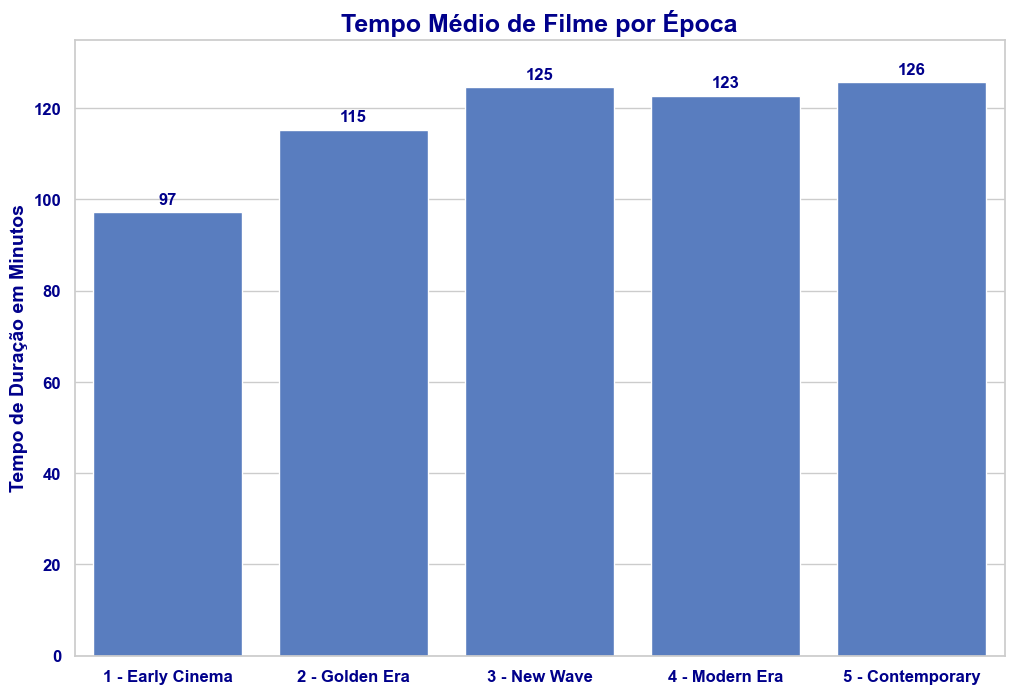

In [27]:
df_groupby = df.groupby('Year_Tag').agg(tempo_medio_de_filme = ("Runtime", "mean"))


barplot_custom(df_groupby,
               col_x= 'Year_Tag',
               col_y = 'tempo_medio_de_filme',
               title="Tempo Médio de Filme por Época",
               y_label='Tempo de Duração em Minutos',
               bar_anotate = True,
               y_lim=[0,135])

### Generos

In [28]:
# Separandos os generos dos filmes
generos = df.assign(Genre=df['Genre'].str.split(', '))\
            .explode('Genre')

# Visualizando o DataFrame com os gêneros separados
generos.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year_Tag
0,The Godfather,1972,A,175,Crime,9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.00,3 - New Wave
0,The Godfather,1972,A,175,Drama,9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.00,3 - New Wave
1,The Dark Knight,2008,UA,152,Action,9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.00,5 - Contemporary
1,The Dark Knight,2008,UA,152,Crime,9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.00,5 - Contemporary
1,The Dark Knight,2008,UA,152,Drama,9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.00,5 - Contemporary


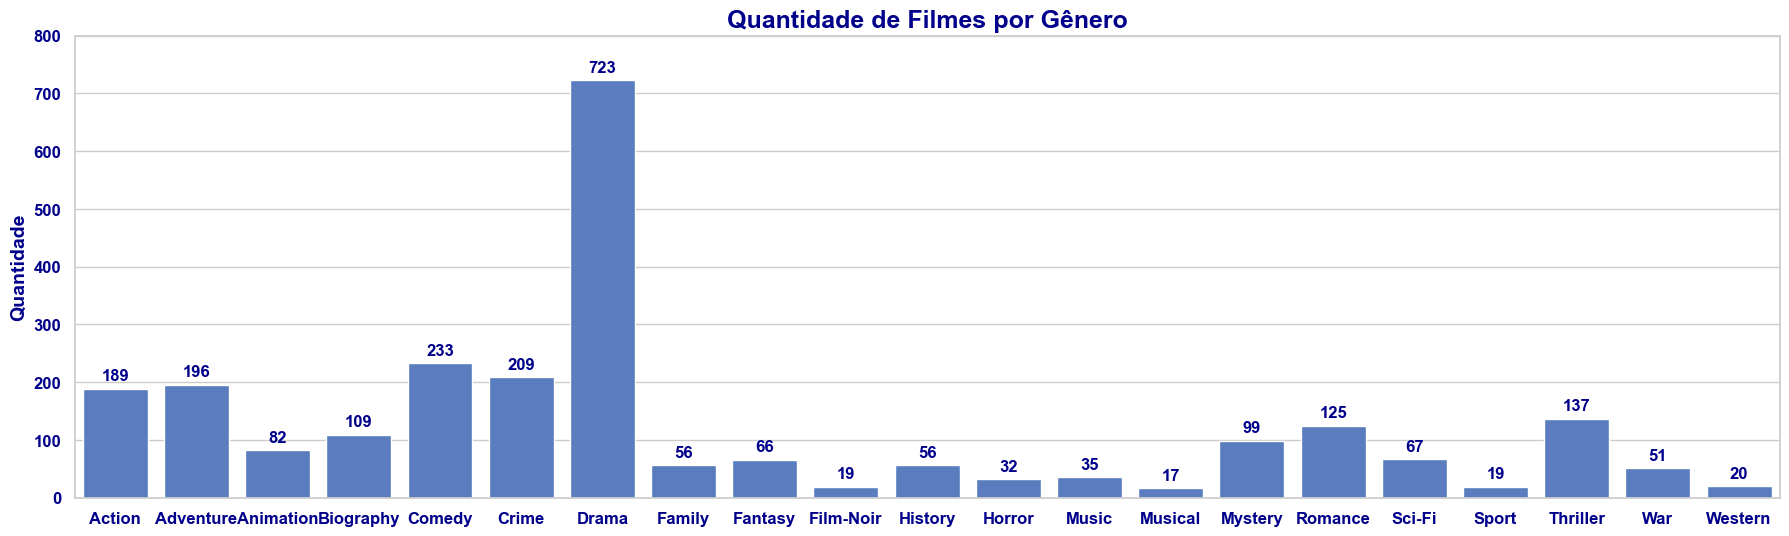

In [29]:
df_groupby = generos.groupby("Genre").agg(quantidade_filmes = ('Series_Title', 'count'))

barplot_custom(df_groupby,
               figsize=(22,6),
               col_x= 'Genre',
               col_y = 'quantidade_filmes',
               title="Quantidade de Filmes por Gênero",
               y_label='Quantidade',
               bar_anotate = True,
               y_lim=[0,800])

In [30]:
@interact(year_tag = set(generos.Year_Tag))
def plot_bar_plot_custom_interativo(year_tag):
    df_groupby = generos.query(f'Year_Tag == "{year_tag}"').groupby("Genre").agg(quantidade_filmes = ('Series_Title', 'count'))

    barplot_custom(df_groupby,
                   figsize=(22,6),
                   col_x= 'Genre',
                   col_y = 'quantidade_filmes',
                   title=f"Quantidade de Filmes por Gênero na época {year_tag}",
                   y_label='Quantidade',
                   bar_anotate = True)

interactive(children=(Dropdown(description='year_tag', options=('4 - Modern Era', '1 - Early Cinema', '5 - Con…

In [31]:
df_groupby = generos.groupby('Genre').agg(soma_faturamento = ('Gross', 'sum'))\
                    .sort_values('soma_faturamento',ascending = False)\
                    .head(10)

df_groupby

,soma_faturamento
Genre,
Adventure,28174317369.00
Drama,27469281160.00
Action,22033328131.00
Comedy,12247931579.00
Sci-Fi,9029610220.00
Animation,8573824407.00
Crime,6956303927.00
Thriller,6454428931.00
Fantasy,6082543147.00


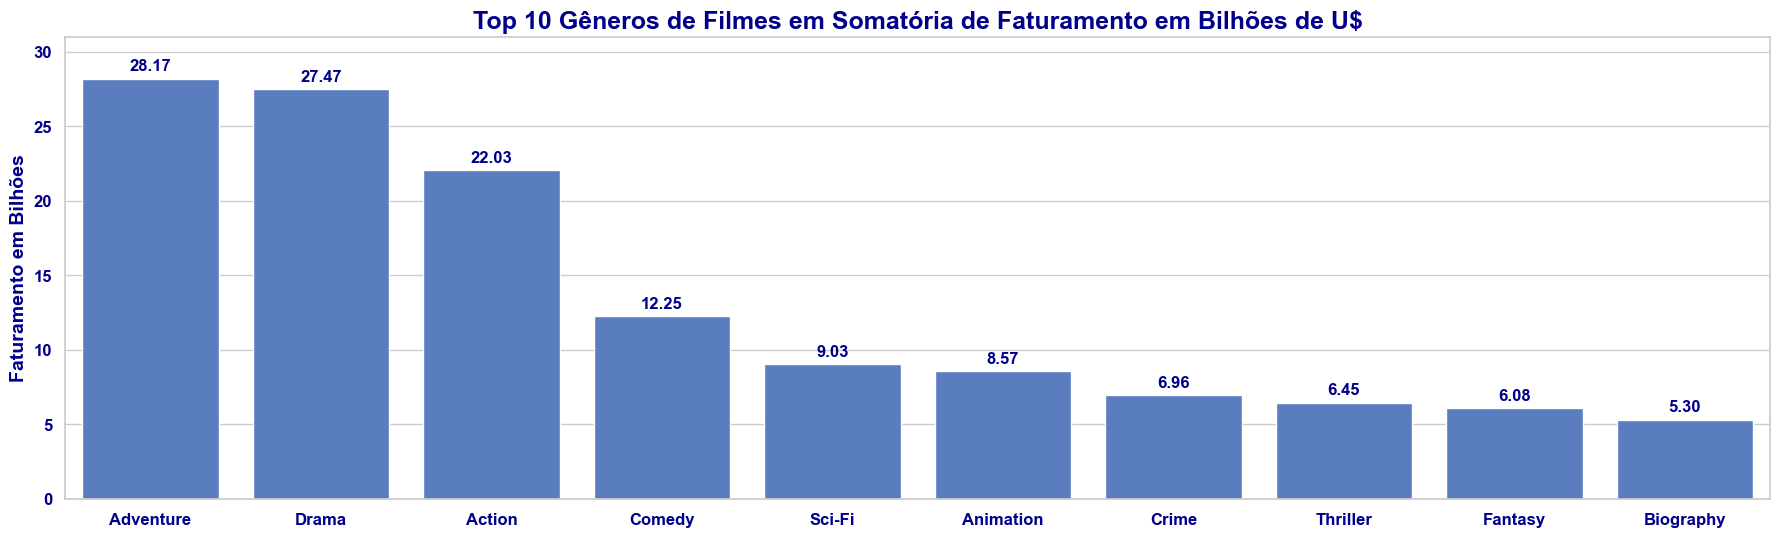

In [32]:
df_groupby['soma_faturamento'] = df_groupby['soma_faturamento'] / 10**9

barplot_custom(df_groupby,
               figsize=(22,6),
               col_x= 'Genre',
               col_y = 'soma_faturamento',
               title="Top 10 Gêneros de Filmes em Somatória de Faturamento em Bilhões de U$",
               y_label='Faturamento em Bilhões',
               y_lim=[0,31],
               bar_anotate=True,
               anotate_float=2)

In [33]:
@interact(year_tag = set(generos.Year_Tag))
def plot_bar_plot_custom_interativo(year_tag):
    df_groupby = generos.query(f'Year_Tag == "{year_tag}"')\
                        .groupby('Genre').agg(soma_faturamento = ('Gross', 'sum'))\
                        .sort_values('soma_faturamento',ascending = False)\
                        .head(10)
    df_groupby['soma_faturamento'] = df_groupby['soma_faturamento'] / 10**9

    barplot_custom(df_groupby,
                   figsize=(22,6),
                   col_x= 'Genre',
                   col_y = 'soma_faturamento',
                   title=f"Top 10 Gêneros de Filmes em Somatória de Faturamento em Bilhões de U$ por Época: {year_tag}",
                   y_label='Faturamento em Bilhões',
                   bar_anotate=True,
                   anotate_float=2)

interactive(children=(Dropdown(description='year_tag', options=('4 - Modern Era', '1 - Early Cinema', '5 - Con…

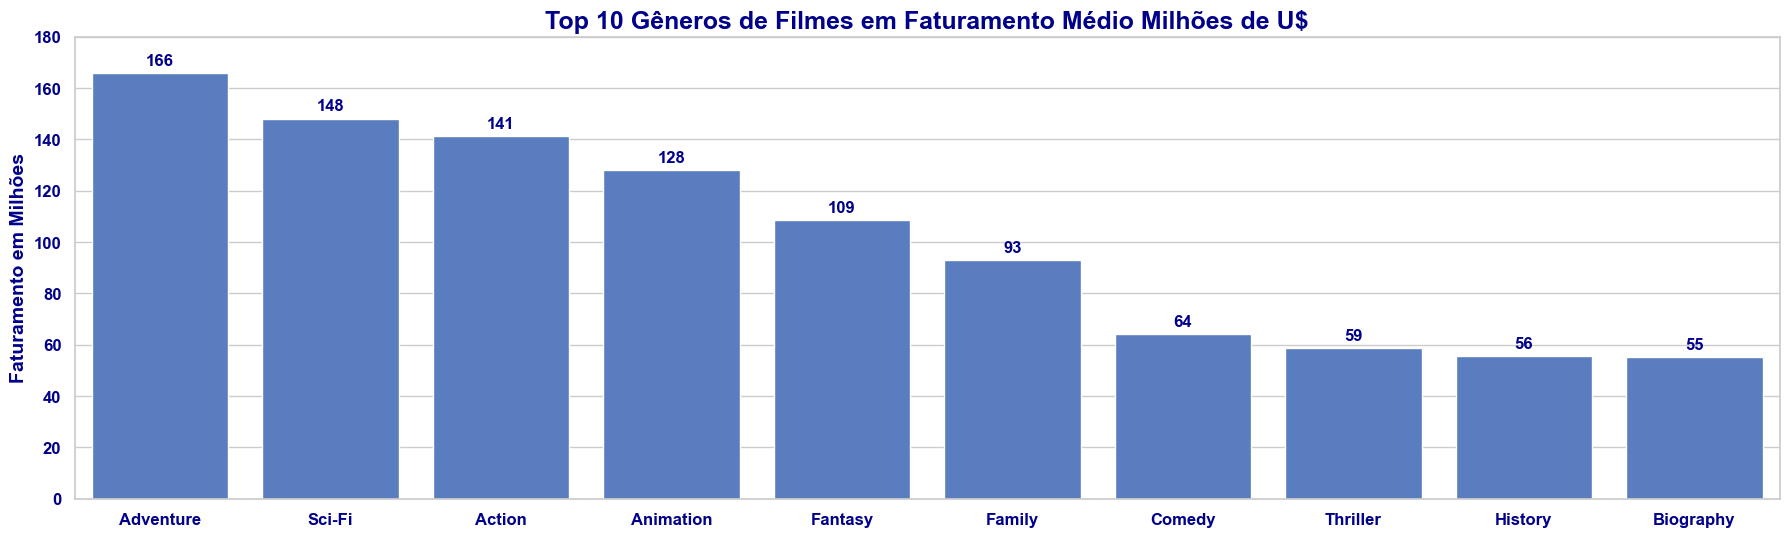

In [34]:
df_groupby = generos.groupby('Genre').agg(faturamento_medio = ('Gross', 'mean'))\
                    .sort_values('faturamento_medio',ascending = False)\
                    .head(10)

df_groupby['faturamento_medio'] = df_groupby['faturamento_medio'] / 10**6

barplot_custom(df_groupby,
               figsize=(22,6),
               col_x= 'Genre',
               col_y = 'faturamento_medio',
               title="Top 10 Gêneros de Filmes em Faturamento Médio Milhões de U$",
               y_label='Faturamento em Milhões',
               y_lim=[0,180],
               bar_anotate=True,
               anotate_float=False)

In [35]:
@interact(year_tag = set(generos.Year_Tag))
def plot_bar_plot_custom_interativo(year_tag):
    df_groupby = generos.query(f'Year_Tag == "{year_tag}"')\
                        .groupby('Genre').agg(faturamento_medio = ('Gross', 'mean'))\
                        .sort_values('faturamento_medio',ascending = False)\
                        .head(10)
    


    df_groupby['faturamento_medio'] = df_groupby['faturamento_medio'] / 10**6

    barplot_custom(df_groupby,
                   figsize=(22,6),
                   col_x= 'Genre',
                   col_y = 'faturamento_medio',
                   title  = f"Top 10 Gêneros de Filmes em Faturamento Médio em Milhões de U$ por Época: {year_tag}",
                   y_label='Faturamento em Milhões',
                   bar_anotate=True,
                   anotate_float=False)

interactive(children=(Dropdown(description='year_tag', options=('4 - Modern Era', '1 - Early Cinema', '5 - Con…

In [36]:
generos.query('Year_Tag == "5 - Contemporary" & Genre == "Western"')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year_Tag
61,Django Unchained,2012,A,165,Western,8.40,"With the help of a German bounty hunter, a fre...",81.00,Quentin Tarantino,Jamie Foxx,Christoph Waltz,Leonardo DiCaprio,Kerry Washington,1357682,162805434.00,5 - Contemporary
903,True Grit,2010,PG-13,110,Western,7.60,A stubborn teenager enlists the help of a toug...,80.00,Ethan Coen,Joel Coen,Jeff Bridges,Matt Damon,Hailee Steinfeld,311822,171243005.00,5 - Contemporary


In [162]:
generos.query('Year_Tag == "5 - Contemporary"').groupby("Genre").agg(total_votos = ("No_of_Votes", 'sum')).sort_values("total_votos", ascending=False)

,total_votos
Genre,
Drama,100713149
Adventure,60920654
Action,55675378
Comedy,32234492
Crime,29987181
Thriller,24371543
Sci-Fi,23527754
Biography,19221604
Mystery,17542493


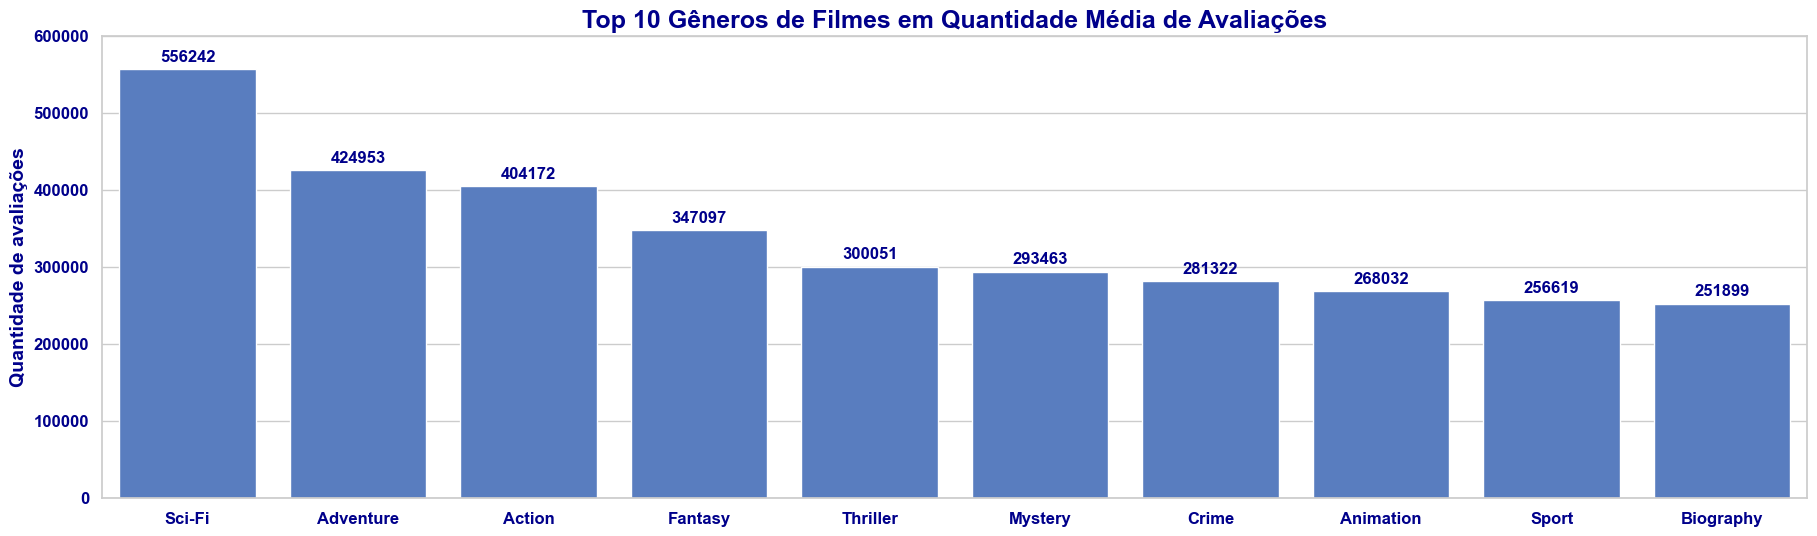

In [37]:
df_groupby = generos.groupby('Genre').agg(qtd_votos_medio = ('No_of_Votes', 'mean'))\
                    .sort_values('qtd_votos_medio', ascending = False)\
                    .head(10)

barplot_custom(df_groupby,
               figsize=(22,6),
               col_x= 'Genre',
               col_y = 'qtd_votos_medio',
               title="Top 10 Gêneros de Filmes em Quantidade Média de Avaliações",
               y_label='Quantidade de avaliações',
               bar_anotate=True,
               y_lim=[0,600000])

In [38]:
@interact(year_tag = set(generos.Year_Tag))
def plot_bar_plot_custom_interativo(year_tag):
    df_groupby = generos.query(f'Year_Tag == "{year_tag}"')\
                        .groupby('Genre').agg(qtd_votos_medio = ('No_of_Votes', 'mean'))\
                        .sort_values('qtd_votos_medio', ascending = False)\
                        .head(10)
    max = df_groupby['qtd_votos_medio'].max() * 1.1

    barplot_custom(df_groupby,
                   figsize=(22,6),
                   col_x= 'Genre',
                   col_y = 'qtd_votos_medio',
                   title=f"Top 10 Gêneros de Filmes em Quantidade Média de Avaliações por Época: {year_tag}",
                   y_label='Quantidade de avaliações',
                   bar_anotate=True,
                   y_lim=[0,max])

interactive(children=(Dropdown(description='year_tag', options=('4 - Modern Era', '1 - Early Cinema', '5 - Con…

### Elenco e Direção

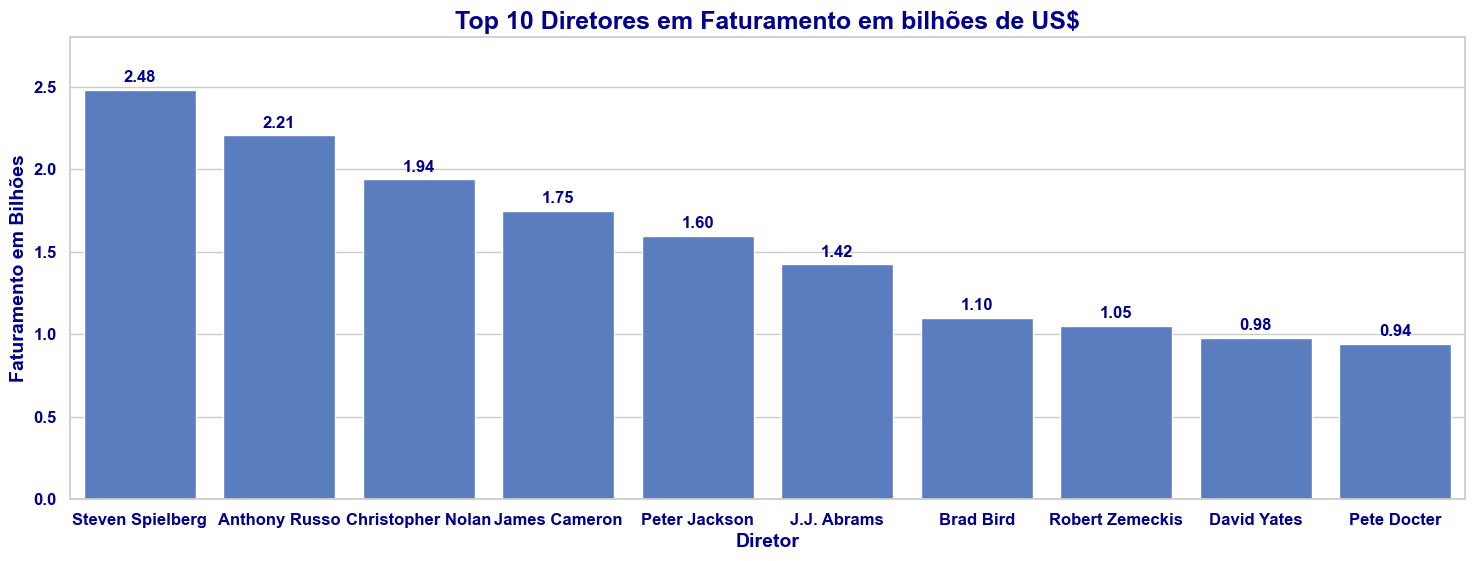

In [39]:
df_groupby = df.groupby("Director").agg(faturamento_total = ("Gross","sum"))\
               .sort_values("faturamento_total",ascending=False)\
               .head(10)

df_groupby["faturamento_total"] = df_groupby["faturamento_total"] / 10**9

barplot_custom(df_groupby,
               figsize=(18,6),
               col_x= 'Director',
               col_y = 'faturamento_total',
               title="Top 10 Diretores em Faturamento em bilhões de US$",
               y_label='Faturamento em Bilhões',
               x_label = 'Diretor',
               bar_anotate=True,
               anotate_float=2,
               y_lim=[0, 2.8])

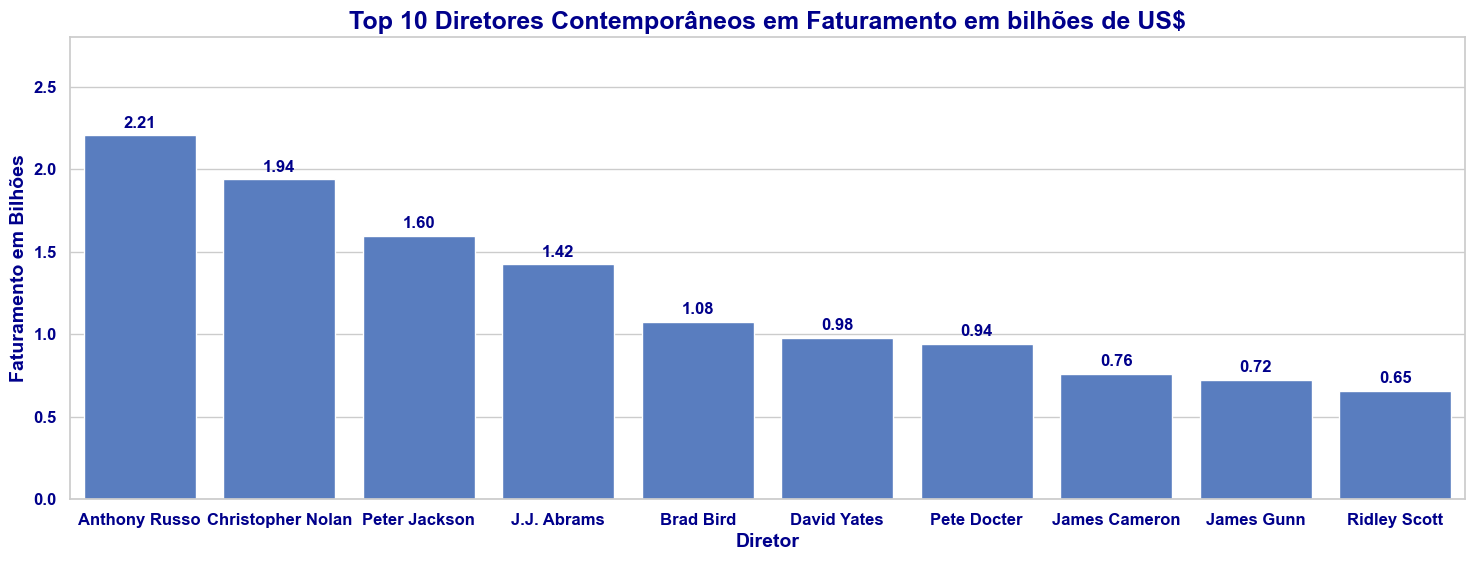

In [40]:
df_groupby = df.query('Year_Tag == "5 - Contemporary"')\
               .groupby("Director").agg(faturamento_total = ("Gross","sum"))\
               .sort_values("faturamento_total",ascending=False)\
               .head(10)

df_groupby["faturamento_total"] = df_groupby["faturamento_total"] / 10**9

barplot_custom(df_groupby,
               figsize=(18,6),
               col_x= 'Director',
               col_y = 'faturamento_total',
               title= "Top 10 Diretores Contemporâneos em Faturamento em bilhões de US$",
               y_label='Faturamento em Bilhões',
               x_label = 'Diretor',
               bar_anotate=True,
               anotate_float=2,
               y_lim=[0, 2.8])

In [41]:
df.head(3)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year_Tag
0,The Godfather,1972,A,175,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.00,3 - New Wave
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.00,5 - Contemporary
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.00,3 - New Wave


In [42]:
df.query('Year_Tag == "5 - Contemporary"')\
  .groupby("Director").agg(qtd_avaliacoes = ("No_of_Votes","sum"))\
  .sort_values("qtd_avaliacoes", ascending=False)\
  .head(10)

,qtd_avaliacoes
Director,
Christopher Nolan,11578345
Peter Jackson,6148579
Quentin Tarantino,5378458
Martin Scorsese,3831885
Anthony Russo,3044263
David Fincher,2962927
Ridley Scott,2858257
Pete Docter,2526411
Denis Villeneuve,2178467


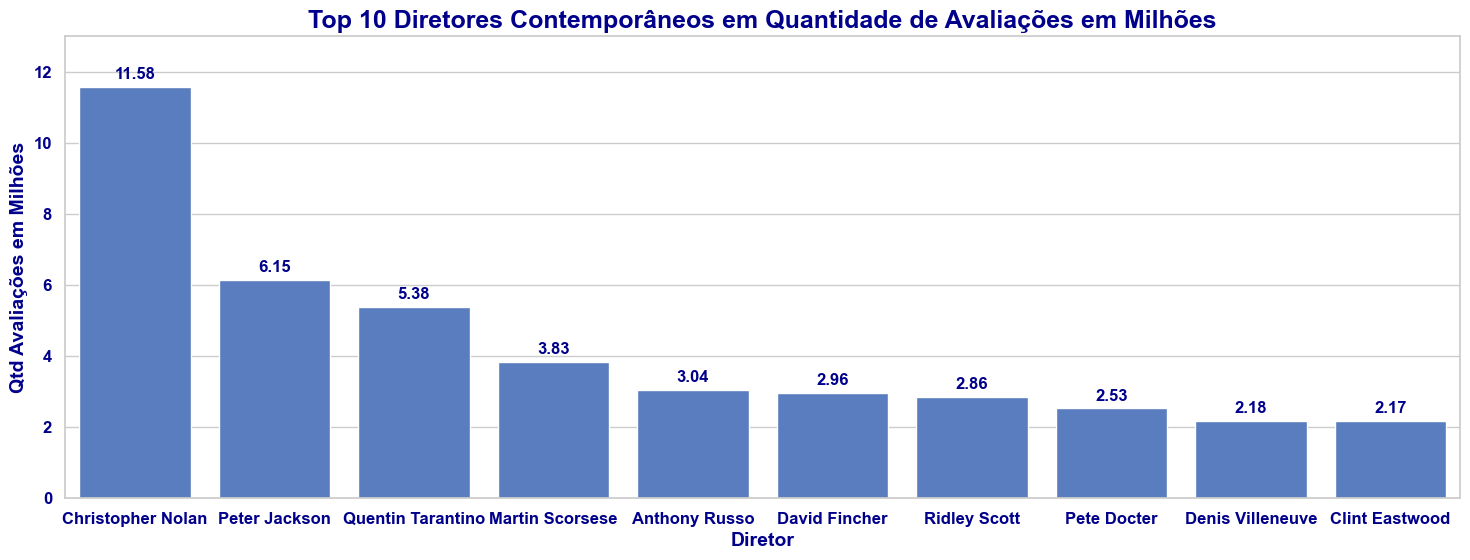

In [43]:
df_groupby = df.query('Year_Tag == "5 - Contemporary"')\
               .groupby("Director").agg(qtd_avaliacoes = ("No_of_Votes","sum"))\
               .sort_values("qtd_avaliacoes", ascending=False)\
               .head(10)

df_groupby["qtd_avaliacoes"] = df_groupby["qtd_avaliacoes"] / 10**6

barplot_custom(df_groupby,
               figsize=(18,6),
               col_x= 'Director',
               col_y = 'qtd_avaliacoes',
               title= "Top 10 Diretores Contemporâneos em Quantidade de Avaliações em Milhões",
               y_label='Qtd Avaliações em Milhões',
               x_label = 'Diretor',
               bar_anotate=True,
               anotate_float=2,
               y_lim=[0,13])

In [44]:
actor_columns = ['Star1', 'Star2', 'Star3', 'Star4']
columns = list(df.drop(actor_columns,axis = 1).columns)

actors_df = df.melt(columns, actor_columns, var_name = 'Star', value_name = 'Actor')
actors_df.head()


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,No_of_Votes,Gross,Year_Tag,Star,Actor
0,The Godfather,1972,A,175,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,1620367,134966411.00,3 - New Wave,Star1,Marlon Brando
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,2303232,534858444.00,5 - Contemporary,Star1,Christian Bale
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,1129952,57300000.00,3 - New Wave,Star1,Al Pacino
3,12 Angry Men,1957,U,96,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,689845,4360000.00,2 - Golden Era,Star1,Henry Fonda
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.90,Gandalf and Aragorn lead the World of Men agai...,94.00,Peter Jackson,1642758,377845905.00,5 - Contemporary,Star1,Elijah Wood


In [45]:
actors_df.loc[actors_df['Series_Title'] == 'The Godfather']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,No_of_Votes,Gross,Year_Tag,Star,Actor
0,The Godfather,1972,A,175,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,1620367,134966411.00,3 - New Wave,Star1,Marlon Brando
999,The Godfather,1972,A,175,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,1620367,134966411.00,3 - New Wave,Star2,Al Pacino
1998,The Godfather,1972,A,175,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,1620367,134966411.00,3 - New Wave,Star3,James Caan
2997,The Godfather,1972,A,175,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,1620367,134966411.00,3 - New Wave,Star4,Diane Keaton


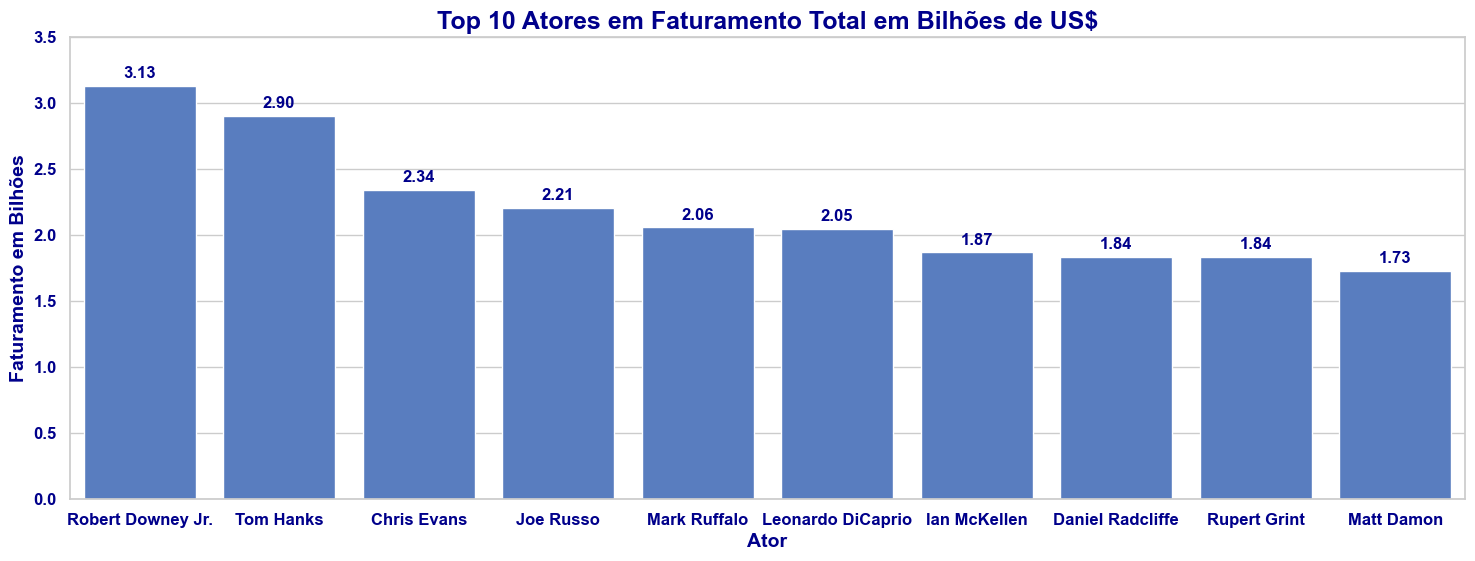

In [46]:
df_groupby = actors_df.groupby("Actor").agg(faturamento_soma = ("Gross", "sum"))\
                      .sort_values("faturamento_soma",ascending=False)\
                      .head(10)

df_groupby["faturamento_soma"] = df_groupby["faturamento_soma"] / 10**9

barplot_custom(df_groupby,
               figsize=(18,6),
               col_x= 'Actor',
               col_y = 'faturamento_soma',
               title= "Top 10 Atores em Faturamento Total em Bilhões de US$",
               y_label='Faturamento em Bilhões',
               x_label = 'Ator',
               bar_anotate=True,
               anotate_float=2,
               y_lim=[0,3.5])

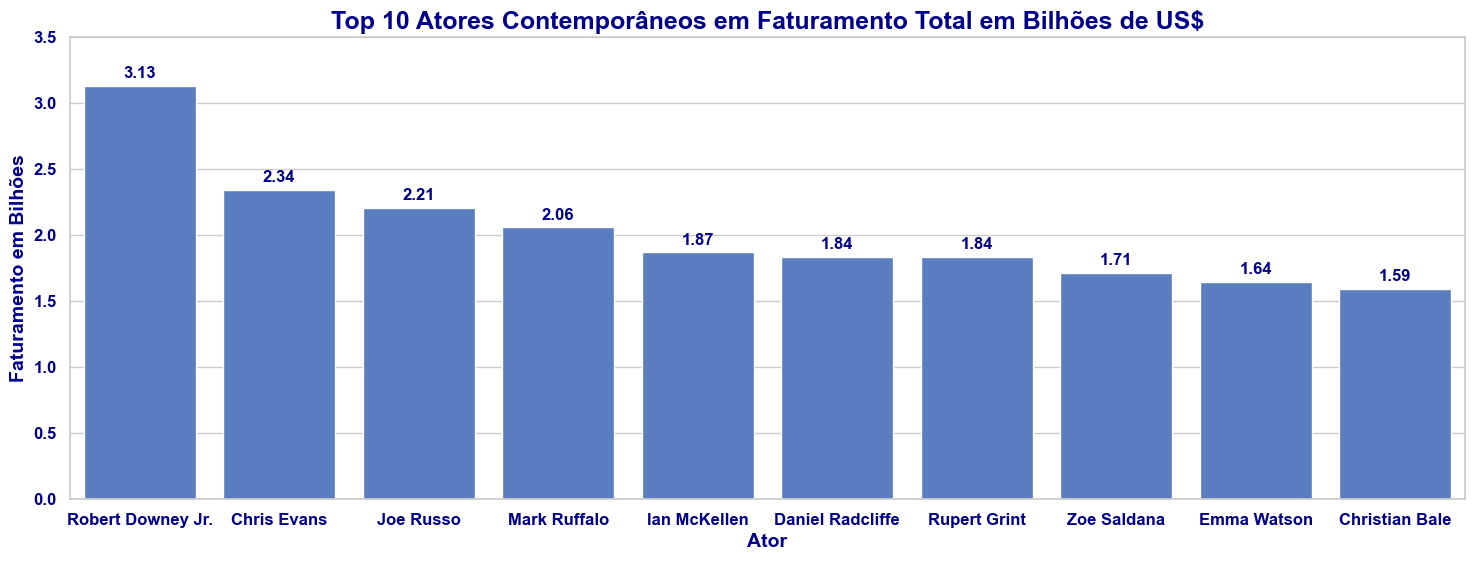

In [47]:
df_groupby = actors_df.query('Year_Tag == "5 - Contemporary"')\
                      .groupby("Actor").agg(faturamento_soma = ("Gross", "sum"))\
                      .sort_values("faturamento_soma",ascending=False)\
                      .head(10)

df_groupby["faturamento_soma"] = df_groupby["faturamento_soma"] / 10**9

barplot_custom(df_groupby,
               figsize=(18,6),
               col_x= 'Actor',
               col_y = 'faturamento_soma',
               title= "Top 10 Atores Contemporâneos em Faturamento Total em Bilhões de US$",
               y_label='Faturamento em Bilhões',
               x_label = 'Ator',
               bar_anotate=True,
               anotate_float=2,
               y_lim=[0,3.5])

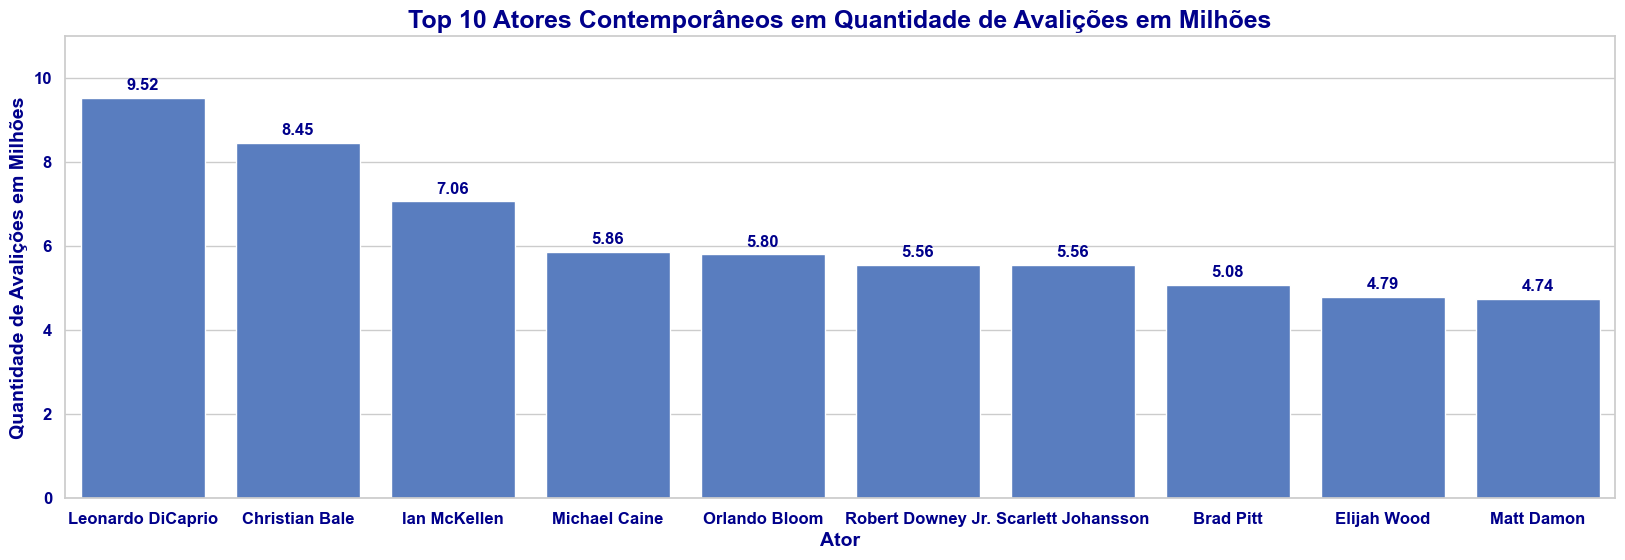

In [48]:
df_groupby = actors_df.query('Year_Tag == "5 - Contemporary"')\
                      .groupby("Actor").agg(qtd_avaliacoes = ("No_of_Votes", "sum"))\
                      .sort_values("qtd_avaliacoes",ascending=False)\
                      .head(10)

df_groupby["qtd_avaliacoes"] = df_groupby["qtd_avaliacoes"] / 10**6

barplot_custom(df_groupby,
               figsize=(20,6),
               col_x = 'Actor',
               col_y = 'qtd_avaliacoes',
               title = "Top 10 Atores Contemporâneos em Quantidade de Avalições em Milhões",
               y_label ='Quantidade de Avalições em Milhões',
               x_label = 'Ator',
               bar_anotate = True,
               anotate_float = 2,
               y_lim=[0,11])

### Distribuições e Correlação

Ao utilizar o método `describe()` é possivel verificar que as colunas `No_of_Votes` e  `Gross` podem conter outliers, pois os valores máximos e mínimos são discrepantes dos 75% destes dados.

In [49]:
df.drop("Released_Year", axis = 1).describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.00,999.00,842.00,999.00,830.00
mean,122.87,7.95,77.97,271621.42,68082574.10
std,28.10,0.27,12.38,320912.62,109807553.39
min,45.00,7.60,28.00,25088.00,1305.00
25%,103.00,7.70,70.00,55471.50,3245338.50
50%,119.00,7.90,79.00,138356.00,23457439.50
75%,137.00,8.10,87.00,373167.50,80876340.25
max,321.00,9.20,100.00,2303232.00,936662225.00


In [110]:
columns_numeric = ["Runtime",'IMDB_Rating', "Meta_score","No_of_Votes","Gross" ]

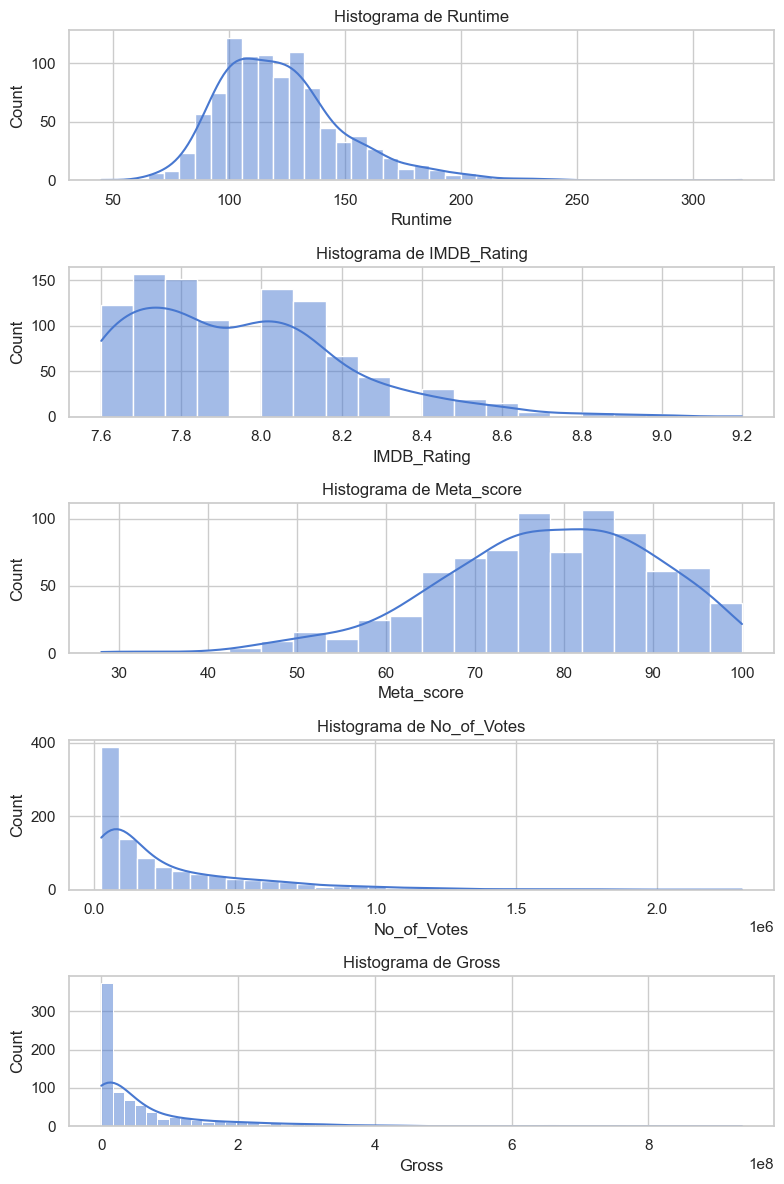

In [111]:
fig, axes = plt.subplots(len(columns_numeric), 1, figsize=(8, 12))

for ax, col in zip(axes, columns_numeric):
    sns.histplot(data = df[col], ax=ax, kde=True)
    ax.set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

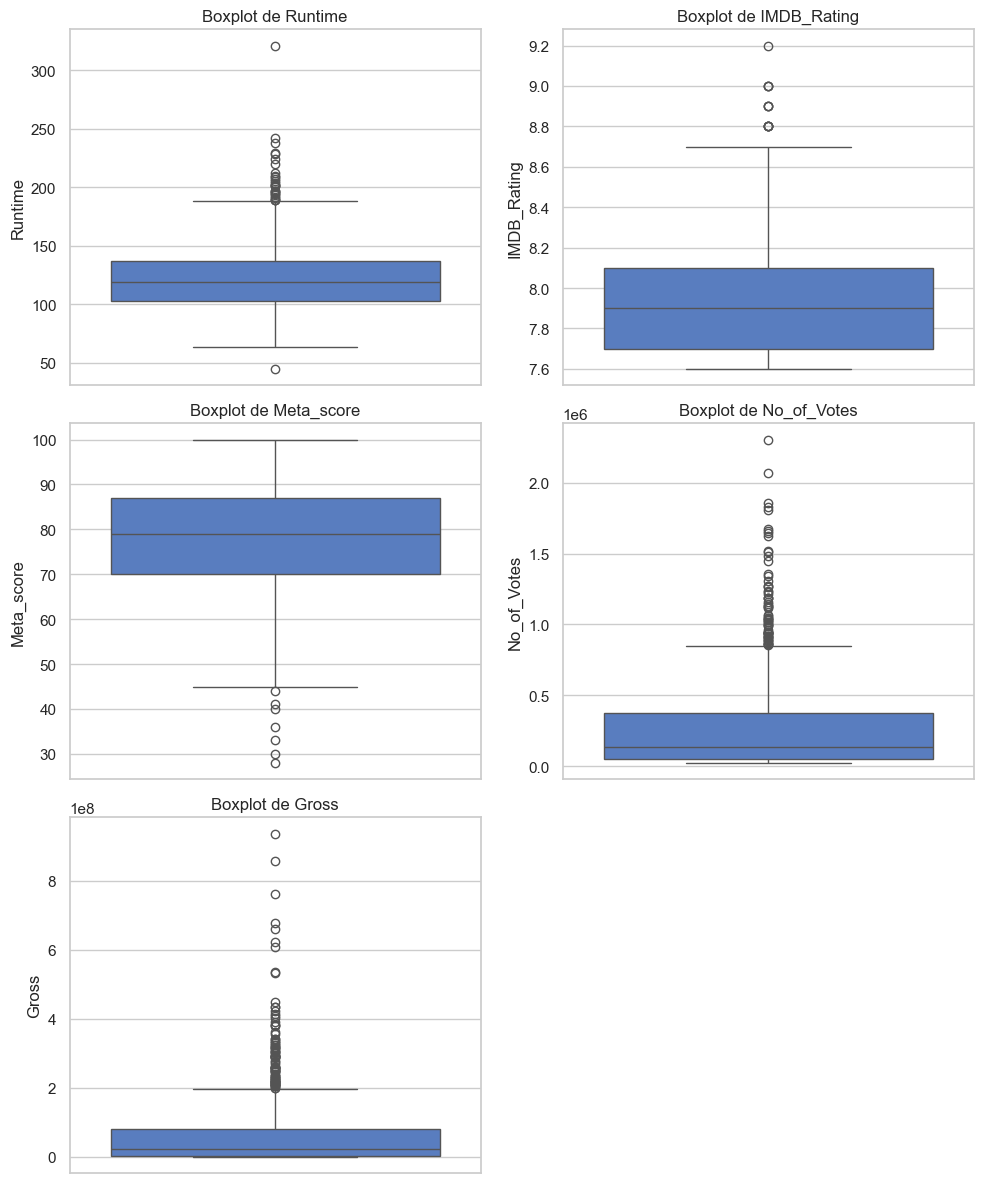

In [112]:
# Criar subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

# Achatar a matriz de eixos
axes = axes.flatten()

# Plotar cada coluna em um subplot diferente
for ax, col in zip(axes, columns_numeric):
    sns.boxplot(data = df[col], ax=ax)
    ax.set_title(f'Boxplot de {col}')

# Remover quaisquer subplots extras que não contêm gráficos
for i in range(len(columns_numeric), len(axes)):
    fig.delaxes(axes[i])

# Ajustar layout
plt.tight_layout()
plt.show()

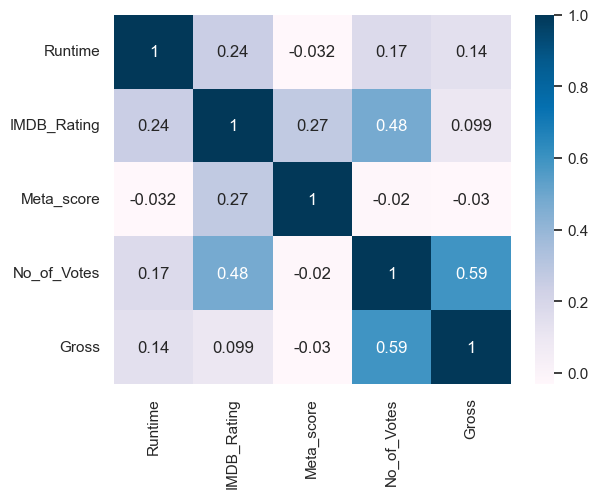

In [138]:
ax = sns.heatmap(df[columns_numeric].corr(), annot=True, cmap = "PuBu")

## 3. Preparação dos Dados

## 4. Modelagem

### 4.1 Modelo de Regressão Para Predição de Nota IMDB

### 4.2 Modelo de Classificação para Predição de Genero dos Filmes

### 4.3 Modelo de Recomendação

## 5. Avaliação

## 6. Deploy

# Perguntas do Desafio

### 1 - Qual filme você recomendaria para uma pessoa que você não conhece?

Para definir qual filme indicar de forma somente explortória, irei considerar a quantidade de avaliações dos filmes contemporâneos em relação a atores, direção e genero mais populares.

- O ator **Leonardo DiCaprio**  é o mais popular, somando 9521072 de votos em seus filmes contemporâneos.
- O diretor mais popular da atualidade considerando-se a quantidade total de avaliações é o **Christopher Nolan** 
- Os 3 generos mais popular são **Drama**, **Ação** e **Aventura** em quantidade total de avaliações.

In [200]:
ator = 'Actor == "Leonardo DiCaprio"'
diretor = 'Director == "Christopher Nolan"'
genero = '(Genre.str.contains("Drama") | Genre.str.contains("Action") | Genre.str.contains("Adventure"))'

actors_df.query(f'''{ator} & {diretor} & {genero}''')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,No_of_Votes,Gross,Year_Tag,Star,Actor
7,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.80,A thief who steals corporate secrets through t...,74.00,Christopher Nolan,2067042,292576195.00,5 - Contemporary,Star1,Leonardo DiCaprio


### 2 - Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 

In [204]:
df.sort_values("Gross",ascending=False).head(10)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Year_Tag
476,Star Wars: Episode VII - The Force Awakens,2015,U,138,"Action, Adventure, Sci-Fi",7.90,"As a new threat to the galaxy rises, Rey, a de...",80.00,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.00,5 - Contemporary
58,Avengers: Endgame,2019,UA,181,"Action, Adventure, Drama",8.40,After the devastating events of Avengers: Infi...,78.00,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.00,5 - Contemporary
622,Avatar,2009,UA,162,"Action, Adventure, Fantasy",7.80,A paraplegic Marine dispatched to the moon Pan...,83.00,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.00,5 - Contemporary
59,Avengers: Infinity War,2018,UA,149,"Action, Adventure, Sci-Fi",8.40,The Avengers and their allies must be willing ...,68.00,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.00,5 - Contemporary
651,Titanic,1997,UA,194,"Drama, Romance",7.80,A seventeen-year-old aristocrat falls in love ...,75.00,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379.00,4 - Modern Era
356,The Avengers,2012,UA,143,"Action, Adventure, Sci-Fi",8.00,Earth's mightiest heroes must come together an...,69.00,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner,1260806,623279547.00,5 - Contemporary
890,Incredibles 2,2018,UA,118,"Animation, Action, Adventure",7.60,The Incredibles family takes on a new mission ...,80.00,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,Huck Milner,250057,608581744.00,5 - Contemporary
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.00,5 - Contemporary
581,Rogue One,2016,UA,133,"Action, Adventure, Sci-Fi",7.80,The daughter of an Imperial scientist joins th...,65.00,Gareth Edwards,Felicity Jones,Diego Luna,Alan Tudyk,Donnie Yen,556608,532177324.00,5 - Contemporary
62,The Dark Knight Rises,2012,UA,164,"Action, Adventure",8.40,Eight years after the Joker's reign of anarchy...,78.00,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099.00,5 - Contemporary


### 3 - Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

### 4 - Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

### 5 - Supondo um filme com as seguintes características:

```
{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}
 ```

### Qual seria a nota do IMDB?

### 6 - Salve o modelo desenvolvido no formato .pkl. 

## responder peguntas de qual filme fazer

Selecionar filmes modernos, avaliar o genero mais popular e mais rentavel, diretor mais popular  e mais rentavel, lista de atores mais populares e mais rentaveis

## Desafio
Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).


**A entrega deve ser feita através de um repositório de código público que contenha:**
- README explicando como instalar e executar o projeto
- Arquivo de requisitos com todos os pacotes utilizados e suas versões
- Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
- Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
- Arquivo .pkl conforme passo 5 acima.
- Todos os códigos produzidos devem seguir as boas práticas de codificação.

